# (12104) Chesley orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '12104'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0

In [4]:
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_optical_obs_array(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)

Skipped 28 observations 
	 28 of which were non-geocentric occultations or space-based observations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 1814 observations. Debiased 1273 observations. No biasing information for 10 observations.
Applied default weight of 1 arcsec to 145 CCD observations
Deweighted 798 observations as part of deweighting scheme.


In [5]:
n_iter_max = 10
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.431			 0.478			 1417.257			 0.229
2			 0.431			 0.478			 1416.553			 0.229
Converged without rejecting outliers. Starting outlier rejection now.
3			 0.403			 0.431			 1146.521			 0.186
4			 0.402			 0.431			 1145.799			 0.186
Converged after rejecting outliers.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 4 (of 4):
RMS unweighted: 0.40239410716187474
RMS weighted: 0.4312844482967084
chi-squared: 1145.7986561103917
reduced chi-squared: 0.18618762692726545
square root of reduced chi-squared: 0.4314946429879118
t: MJD 57738.0 TDB
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty				Change				Change (sigma)
e			2.41594472929e-02		2.94002577556e-08 		2.41594447724e-02		2.81525445232e-08 		-2.52044965454e-09		-0.086
q			2.93828018638e+00		8.99390539895e-08 		2.93828019458e+00		8.62601575784e-08 		+8.20120371614e-09		+0.091
tp			5.68199558150e+04		3.84031128759e-04 		5.68199558169e+04		3.72421493560e-04 		+1.86382385436e-06		+0.005
om			7.80621777762e+01		1.66301228578e-05 		7.80621782966e+01		1.68823031091e-05 		+5.20383935054e-07		+0.031
w			1.83000116206e+02		7.37415160678e-05 		1.83000116024e+02		7.16557110289e-05 		-1.82128445658e-07		-0.002
i			1.11515692119e+01		3.36526255700e-06 		1.11515693820e+01		3.422921486

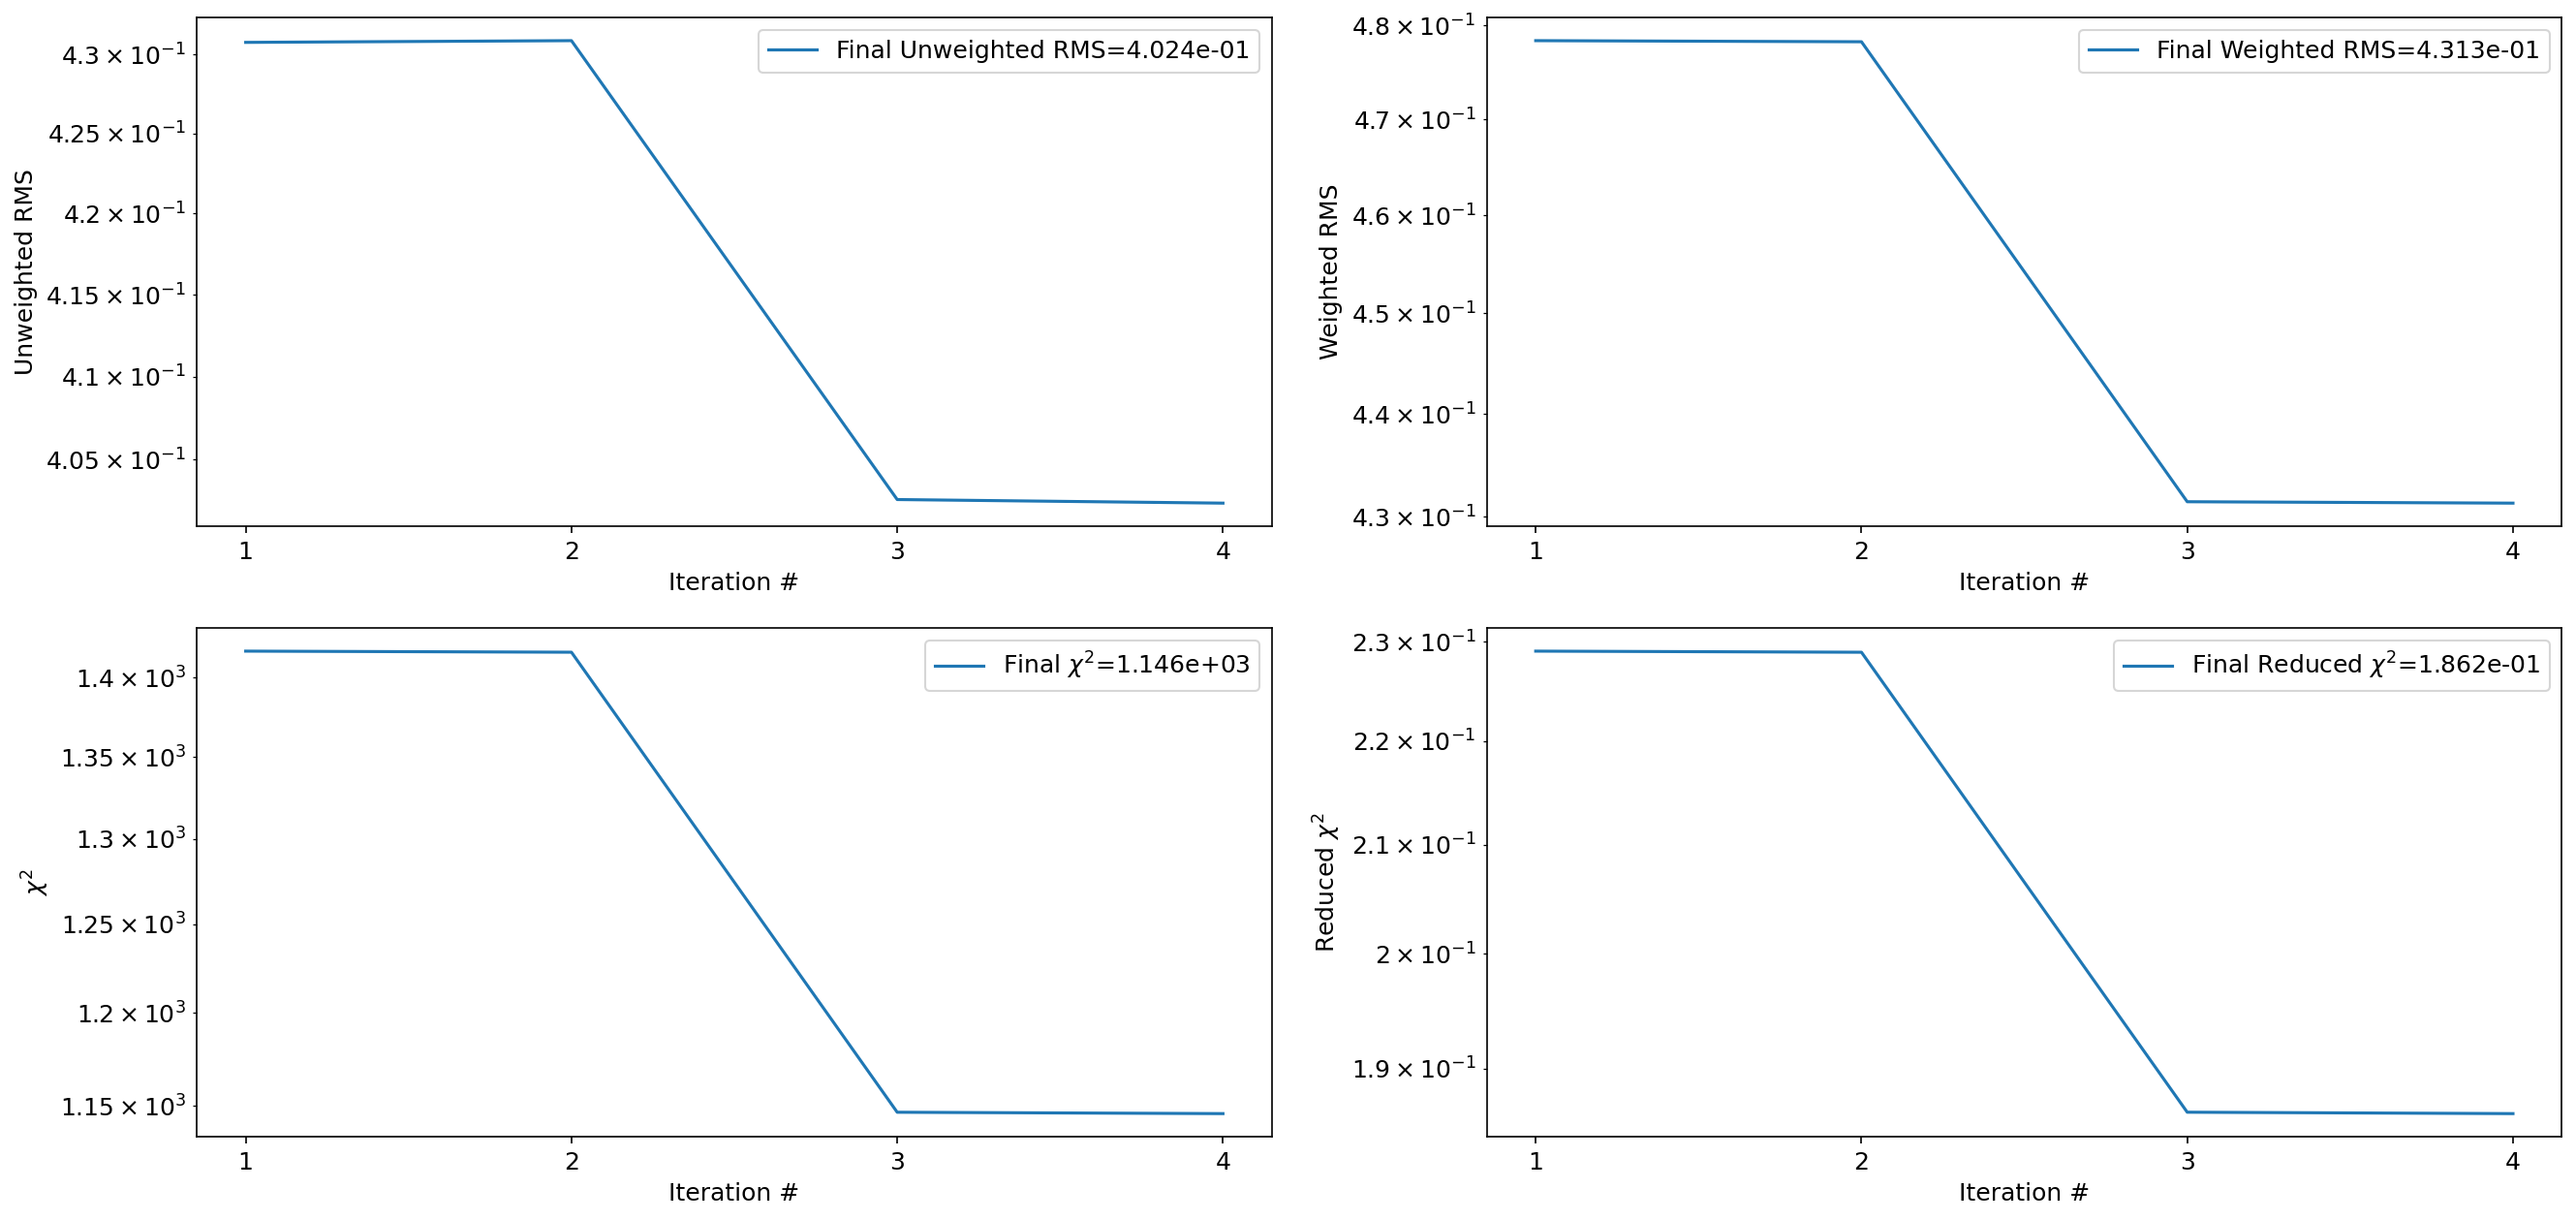

In [8]:
fit_sim.plot_summary(auto_close=True)

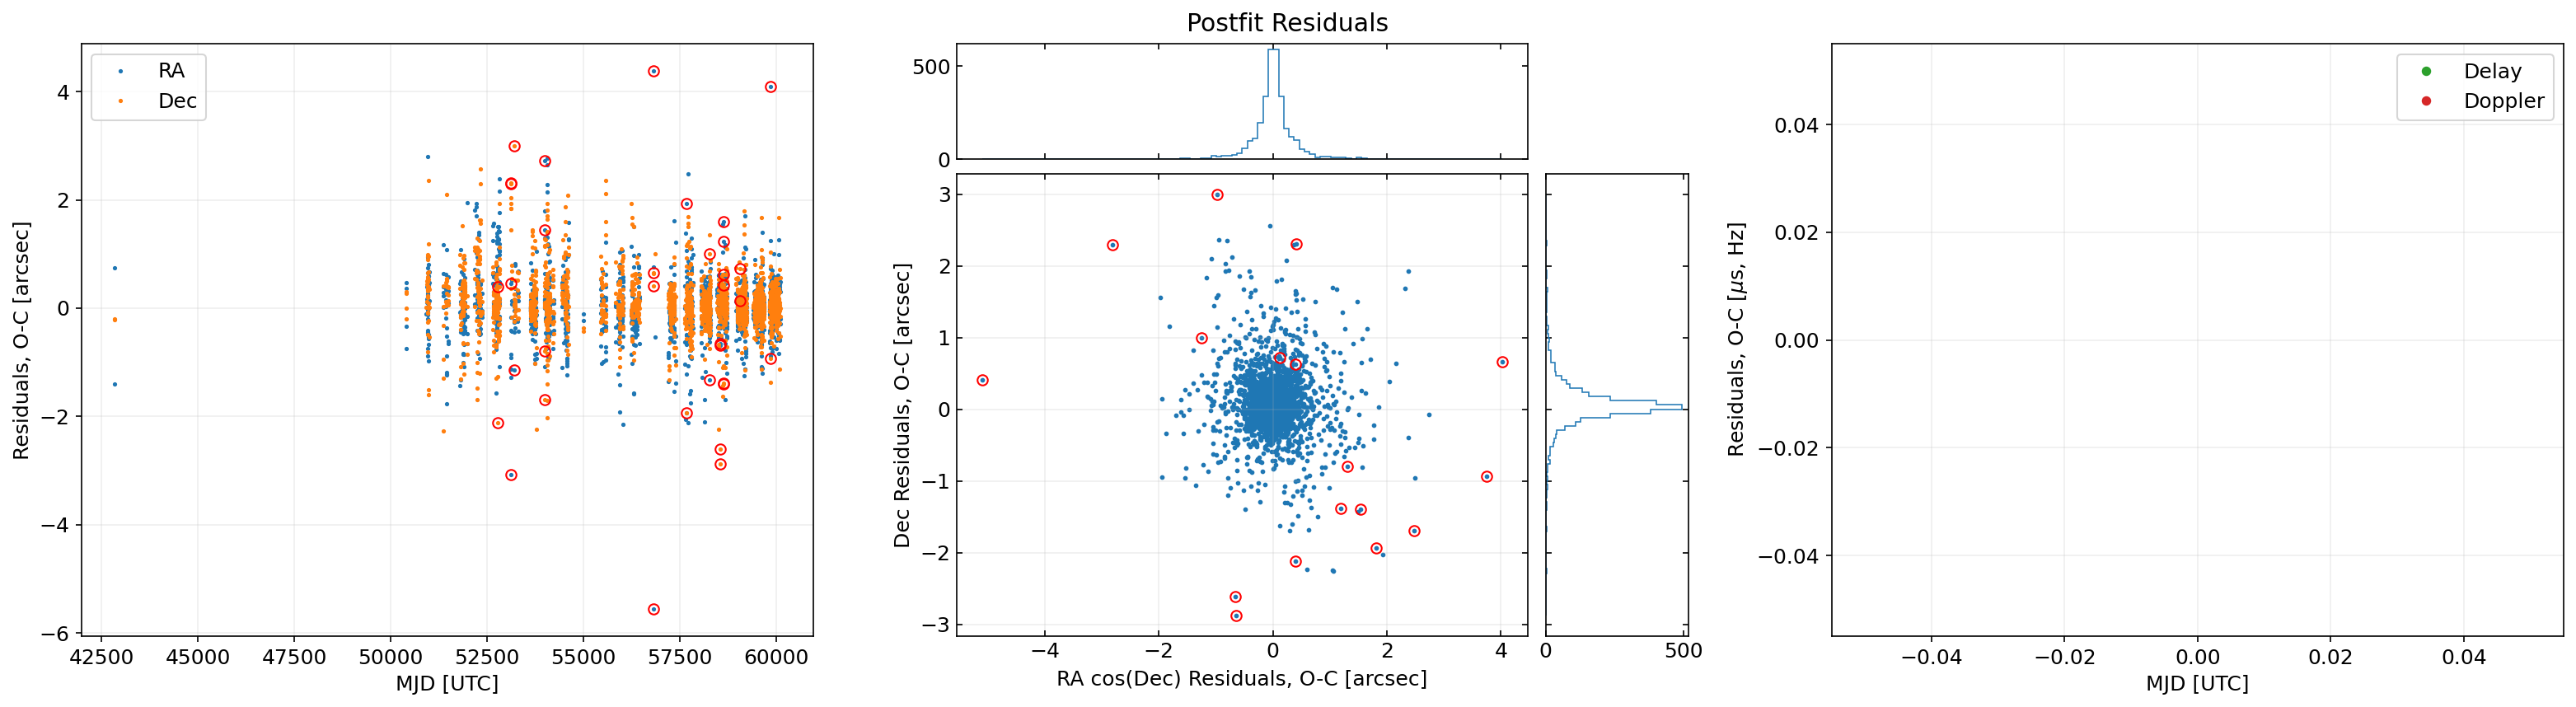

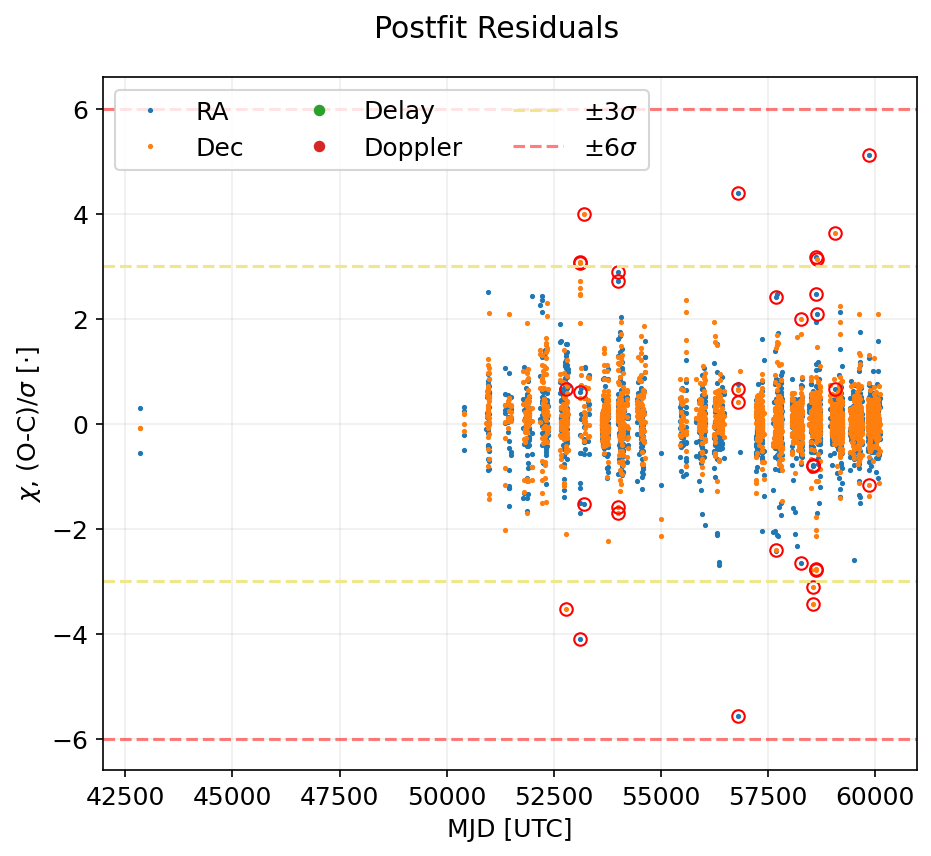

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)